<a href="https://colab.research.google.com/github/phucle103198/Stable-Diffusion-Application/blob/main/Generate_QR_with_support_by_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install package
## - Diffuser for Generate Image
## - Transformers, Xformers, Acclerate for transform text to prompts
## - QR for create QR code by URL

In [ ]:
!pip -q install diffusers transformers xformers qrcode accelerate
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Generate QR code

In [ ]:
import qrcode
from PIL import Image

In [ ]:
class QrCodeGenerator():
  def __init__(self):
    self.qr = qrcode.QRCode(
        version = 1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size = 16,
        border=0,
    )
  def generator_qr_code(self, qrcode_content: str):
    self.qr.add_data(qrcode_content)
    self.qr.make(fit=True)

    img = self.qr.make_image(fill_color="black", back_color="white")
    return img.get_image()

  def add_offset_background(self, img: Image, offset_min: int = 0):
    w, h = img.size
    w = (w + 255 + offset_min)
    h = (h + 255 + offset_min)

    if w > 1024:
      raise ValueError("Qr Code is too big, please re-generate a shorter URL")
    bg_img = Image.new('L', (w,h), 255)
    coords = ((w-img.size[0]) // 2 // 16*16,
              (h-img.size[1]) // 2// 16*16)
    bg_img.paste(img, coords)
    return bg_img


In [ ]:
qrcode_gen = QrCodeGenerator()
qrcode_img = qrcode_gen.generator_qr_code('https://github.com/phucle103198')
bg_qrcode_img = qrcode_gen.add_offset_background(qrcode_img)
bg_qrcode_img.size

(783, 783)

## Import package for load model generate image

In [ ]:
import torch
from diffusers import ControlNetModel, StableDiffusionControlNetImg2ImgPipeline, DDIMScheduler
from diffusers.utils import load_image
from typing import Tuple

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v1p_sd15",
                                             torch_dtype=torch.float16)

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
cn_pipeline = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16

)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
cn_pipeline.enable_xformers_memory_efficient_attention()
cn_pipeline.scheduler = DDIMScheduler.from_config(cn_pipeline.scheduler.config)
cn_pipeline.enable_model_cpu_offload()

In [ ]:
bg_qrcode_img.save('qrcode.png')

In [ ]:
## Function for load image and resize

In [ ]:
IMG_WIDTH = 768
IMG_HEIGHT = 768

def resize_for_input_image(input_image: Image, resolution: Tuple[int, int] = (IMG_WIDTH, IMG_HEIGHT)):
  input_image = input_image.convert("RGB")
  img = input_image.resize(resolution, resample = Image.LANCZOS)
  return img

# QR Code Image
condition_image = resize_for_input_image(bg_qrcode_img)
# Init Image: can be any thing
init_image = load_image("./qrcode.png")
init_image = resize_for_input_image(init_image)

In [ ]:
generator = torch.Generator()

  0%|          | 0/60 [00:00<?, ?it/s]

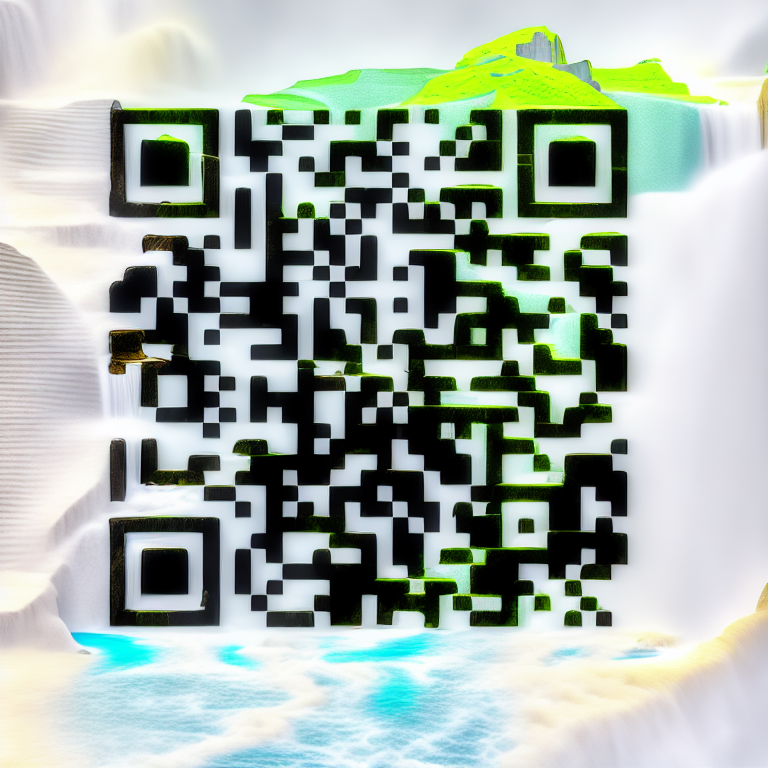

In [ ]:
output = cn_pipeline(
    prompt="View of majestic waterfall, ancient beauty with high aesthetics in beautiful nature",
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    image=init_image,
    control_image=condition_image,
    width=IMG_WIDTH,
    height=IMG_HEIGHT,
    guidance_scale=7.5,
    controlnet_conditioning_scale=2.1,
    generator=generator,
    strength=1.0,
    num_inference_steps=60,
)

output.images[0]